In [10]:
import numpy as np
from data_process import get_FASHION_data
from scipy.spatial import distance

from softmax import Softmax
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder

import matplotlib.pyplot as plt
%matplotlib inline

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# DATASET ANALYSIS

### Loading Fashion-MNIST
TRAIN_IMAGES + VAL_IMAGES = (0, 60000], TEST_IMAGES = 10000

In [13]:
TRAIN_IMAGES = 50000
VAL_IMAGES = 10000
normalize = True

data = get_FASHION_data(TRAIN_IMAGES, VAL_IMAGES, normalize=normalize)
X_train, y_train = data['X_train'], data['y_train']
X_val, y_val = data['X_val'], data['y_val']
X_test, y_test = data['X_test'], data['y_test']
n_class_fashion = len(np.unique(y_test))

### frequency table

In [210]:
train_dat = np.array(np.unique(y_train, return_counts=True)).T
test_dat = np.array(np.unique(y_test, return_counts=True)).T
print("|--------------------------------|")
print("| training set  ||  testing set  |")
print("|===============||===============|")
print("| class | count || class | count |")
print("|-------|-------||-------|-------|")
for cls1, count1, cls2, count2 in np.concatenate((train_dat, test_dat), axis=1):
    print("|  %2d   | %5d ||  %2d   | %5d |" % (cls1, count1, cls2, count2))
print("|--------------------------------|")

|--------------------------------|
| training set  ||  testing set  |
|===============||===============|
| class | count || class | count |
|-------|-------||-------|-------|
|   0   |  4977 ||   0   |  1000 |
|   1   |  5012 ||   1   |  1000 |
|   2   |  4992 ||   2   |  1000 |
|   3   |  4979 ||   3   |  1000 |
|   4   |  4950 ||   4   |  1000 |
|   5   |  5004 ||   5   |  1000 |
|   6   |  5030 ||   6   |  1000 |
|   7   |  5045 ||   7   |  1000 |
|   8   |  5032 ||   8   |  1000 |
|   9   |  4979 ||   9   |  1000 |
|--------------------------------|


# CLUSTER MODELS

- (PCA, PCoA)
- K-means
- Hierarchical
- Self-organizing Maps
- Spectral Clustering

## PCA + K-means (QFQ)

In [108]:
km = KMeans(10)
km.fit(X_train)
km_y_test_pred = km.fit_predict(X_test)

## Self-organizing Maps (FLY)

# CLASSIFICATION MODELS

## Random forest

test accuracy: 0.8759


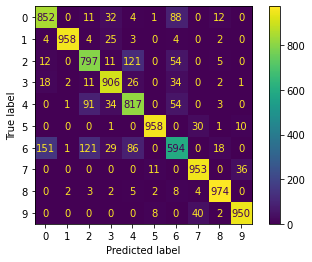

In [123]:
# 87.42(200), 87.79(300), 87.56(400), 87.68(500)
rf = RandomForestClassifier(n_estimators=300, n_jobs=-1)
rf.fit(X_train, y_train)
rf_y_test_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_y_test_pred)
print(f"test accuracy: {rf_acc:.4f}")
ConfusionMatrixDisplay.from_predictions(y_test, rf_y_test_pred)

In [ ]:
rf_matrix = confusion_matrix(y_test, rf_y_test_pred)
print(rf_matrix)
print(rf_matrix.diagonal()/rf_matrix.sum(axis=1))

## *Adaboost

In [ ]:
# ab = AdaBoostClassifier(n_estimators=500, learning_rate=0.01)
# ab.fit(X_train, y_train)
# ab_y_test_pred = ab.predict(X_test)
# ab_acc = accuracy_score(y_test, ab_y_test_pred)
# print(f"test accuracy: {ab_acc:.4f}")

test accuracy: 0.5060


[[ 18   0   0 619   1   0 340   0  22   0]
 [  1   5   0 956   0   0  35   0   3   0]
 [  0   0   5  13  67   0 892   0  23   0]
 [  0   0   0 854   2   0 140   0   4   0]
 [  6   0   0  79 286   0 612   0  17   0]
 [  0   0   0   0   0 869   1   0 108  22]
 [ 16   0   1 204 112   0 633   0  34   0]
 [  0   0   0   0   0 952   0   0  34  14]
 [  0   0   0   6   3   4  91   0 896   0]
 [  0   0   0   0   0 370   0   0  16 614]]
[0.018 0.005 0.005 0.854 0.286 0.869 0.633 0.    0.896 0.614]


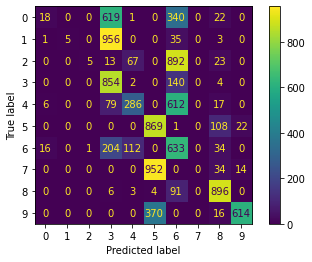

In [ ]:
# ab_matrix = confusion_matrix(y_test, ab_y_test_pred)
# print(ab_matrix)
# print(ab_matrix.diagonal()/ab_matrix.sum(axis=1))

# ConfusionMatrixDisplay.from_predictions(y_test, ab_y_test_pred)

## Gradient Boost

test accuracy: 0.8857


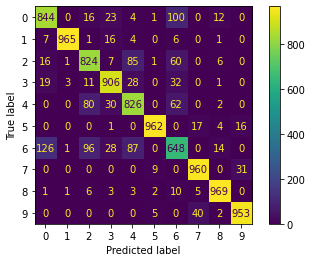

In [118]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1)
gb.fit(X_train, y_train)
gb_y_test_pred = gb.predict(X_test)
gb_acc = accuracy_score(y_test, gb_y_test_pred)
print(f"test accuracy: {gb_acc:.4f}")
ConfusionMatrixDisplay.from_predictions(y_test, gb_y_test_pred)

In [114]:
lr = LogisticRegression(max_iter=10000) # cannot parallel
lr.fit(X_train, y_train)
lr_y_test_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_y_test_pred)
print(f"test accuracy: {lr_acc:.4f}")

test accuracy: 0.8217


[[791  12  10  58   5   2 103   3  14   2]
 [  2 945   5  28   7   2   3   1   3   4]
 [ 19   7 717  15 128   4  93   4  10   3]
 [ 32  24  20 818  34   6  41   8  13   4]
 [  3   7 109  38 747   1  70   5  19   1]
 [  0   2   1   1   1 905   0  44  13  33]
 [135  10 114  42 106   4 550   5  31   3]
 [  0   0   0   0   0  39   0 930   1  30]
 [  7   9  11  15   9  22  25  14 886   2]
 [  0   0   0   1   0  24   1  46   0 928]]
[0.791 0.945 0.717 0.818 0.747 0.905 0.55  0.93  0.886 0.928]


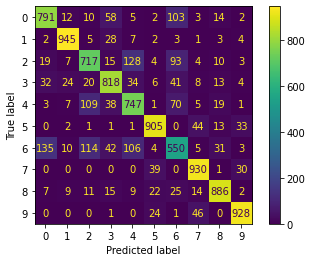

In [115]:
lr_matrix = confusion_matrix(y_test, lr_y_test_pred)
print(lr_matrix)
print(lr_matrix.diagonal()/lr_matrix.sum(axis=1))

ConfusionMatrixDisplay.from_predictions(y_test, lr_y_test_pred)

## KNN

In [125]:
knn_best = None
knn_best_pred = None
knn_best_acc = 0
knn_acc_lst = np.zeros(20)

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(X_train, y_train)
    knn_y_test_pred = knn.predict(X_test)
    knn_acc = accuracy_score(y_test, knn_y_test_pred)
    knn_acc_lst[i-1] = knn_acc
    if knn_acc > knn_best_acc:
        knn_best_acc = knn_acc
        knn_best = knn
        knn_best_k = i
        knn_best_pred = knn_y_test_pred
    print(f"{i}: {knn_acc:.4f}")
# ConfusionMatrixDisplay.from_predictions(y_test, knn_best_pred)

1: 0.8440
2: 0.8445
3: 0.8503
4: 0.8520
5: 0.8512
6: 0.8502
7: 0.8500
8: 0.8495
9: 0.8459


best k: 1, test accuracy: 0.8459


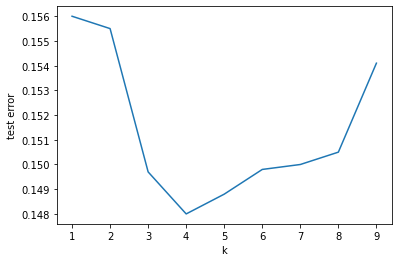

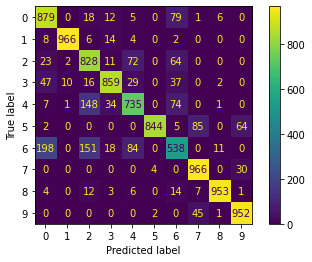

In [150]:
plt.plot(list(range(1, np.nonzero(knn_acc_lst)[0].shape[0]+1)), 1 - knn_acc_lst[np.nonzero(knn_acc_lst)])
plt.xlabel("k")
plt.ylabel("test error")

knn_best_k = np.argmax(knn_acc_lst.max) + 1
knn_acc = accuracy_score(y_test, knn_y_test_pred)
print(f"best k: {knn_best_k}, test accuracy: {knn_acc:.4f}")
ConfusionMatrixDisplay.from_predictions(y_test, knn_best_pred)

In [4]:
def get_acc(pred, y_test):
    return np.sum(y_test == pred) / len(y_test) * 100

In [5]:
# Train
lr = 0.5
n_epochs = 10
reg_const = 0.05
batch_num = 50

svm = SVM(10, lr, n_epochs, reg_const, batch_num)
svm.train(X_train, y_train)

pred_svm = svm.predict(X_train)
print('The training accuracy is given by: %f' % (get_acc(pred_svm, y_train)))

NameError: name 'SVM' is not defined

In [ ]:
# Validate
pred_svm = svm.predict(X_val)
print('The validation accuracy is given by: %f' % (get_acc(pred_svm, y_val)))

In [ ]:
# Test
pred_svm = svm.predict(X_test)
print('The testing accuracy is given by: %f' % (get_acc(pred_svm, y_test)))

## Logistic -> Softmax Classifier (with SGD)

- lr, epoch, regularization constant

In [16]:
# Train
lr = 0.5
n_epochs = 200
reg_const = 1
batch_num = 50

sm = Softmax(n_class_fashion, lr, n_epochs, reg_const, batch_num)
sm.train(X_train, y_train)

sm_y_train_pred = sm.predict(X_train)
print(f'training accuracy: {accuracy_score(y_train, sm_y_train_pred):.4f}')

sm_y_test_pred = sm.predict(X_test)
print(f'testing accuracy: {accuracy_score(y_test, sm_y_test_pred):.4f}')


training accuracy: 0.8401
testing accuracy: 0.8231


# ENSEMBLE

- input: KNN 85.20  +   RF 87.59   +   GB 88.57  +   LR 82.17
- model: Linear regression
- output: final_pred

In [183]:
input = np.array((knn_y_test_pred, rf_y_test_pred, gb_y_test_pred, lr_y_test_pred)).T
enc = OrdinalEncoder()
enc.fit(input)
input_cat = enc.transform(input)

In [188]:
en = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
en.fit(input_cat[:8000], y_test[:8000])

y_hat = en.predict(input_cat[8000:])
en_acc = accuracy_score(y_test[8000:], y_hat)
print(f"test accuracy: {en_acc:.4f}")

test accuracy: 0.8630
